In [38]:
import pandas as pd
import numpy as np
import pydataset as data
import seaborn as sns
import matplotlib.pyplot as plt
import wrangle
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Load your zillow dataset.

In [3]:
train, validate, test = wrangle.wrangle_zillow()

In [4]:
train

,bedroom_count,bathroom_count,calc_sqr_feet,tax_value,yearbuilt,taxamount,county_code,is_county_code_6037.0,is_county_code_6059.0,is_county_code_6111.0
947232,5.0,3.5,3432.0,893004.0,2001.0,13320.60,6059.0,0,1,0
1559262,3.0,3.0,1671.0,260933.0,1947.0,3187.08,6059.0,0,1,0
770438,3.0,2.0,1672.0,167176.0,1959.0,2093.45,6037.0,1,0,0
245576,4.0,2.0,2054.0,738566.0,2002.0,8507.10,6059.0,0,1,0
1695674,3.0,2.0,2132.0,114067.0,1958.0,3159.90,6037.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1035662,5.0,3.0,2308.0,656000.0,1959.0,8042.45,6037.0,1,0,0
463244,3.0,2.0,1700.0,209048.0,1956.0,2411.70,6111.0,0,0,1
1766269,4.0,2.5,2282.0,527044.0,1979.0,6149.84,6111.0,0,0,1
324934,3.0,2.0,1711.0,485663.0,1962.0,6029.84,6037.0,1,0,0


In [6]:
df = train

### Fit a linear regression model (ordinary least squares) and compute yhat, predictions of taxvaluedollarcnt using only calculatedfinishedsqft.

### Here is some sample code to get you started:

```python
from sklearn.linear_model import LinearRegression

# assuming X and y are already defined"
model = LinearRegression().fit(X, y)
predictions = model.predict(X)

```


In [7]:
X = df['calc_sqr_feet'].values.reshape(-1, 1)
y = df['tax_value'].values

In [9]:
model = LinearRegression()


model.fit(X, y)


LinearRegression()

In [11]:
y_pred = model.predict(X)

In [12]:
y_pred

array([884870.71321503, 356362.76540977, 356662.88349484, ...,
       539734.9153865 , 368367.4888125 , 533732.55368513])

### Modify and add to the code above as necessary for it to work with the zillow dataset.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)


In [15]:
# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


LinearRegression()

In [17]:
y_train_pred = model.predict(X_train)



### Plot the residuals for the linear regression model that you made.

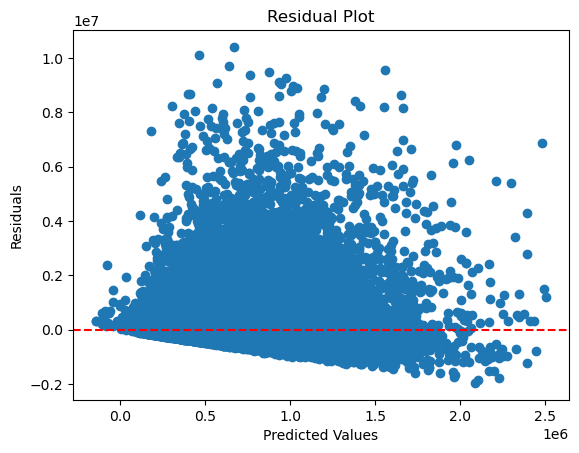

In [26]:
model.fit(X, y)

y_pred = model.predict(X)

residuals = y - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


### Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [34]:
sse = np.sum((y - y_pred) ** 2)

ess = np.sum((y_pred - np.mean(y)) ** 2)

tss = np.sum((y - np.mean(y)) ** 2)

mse = mean_squared_error(y, y_pred)

rmse = np.sqrt(mse)

print('Sum of Squared Errors (SSE):', sse)
print('Explained Sum of Squares (ESS):', ess)
print('Total Sum of Squares (TSS):', tss)
print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)

Sum of Squared Errors (SSE): 9.868462082761645e+16
Explained Sum of Squares (ESS): 3.3813232318681924e+16
Total Sum of Squares (TSS): 1.3249785314632296e+17
Mean Squared Error (MSE): 118499375382.89122
Root Mean Squared Error (RMSE): 344237.3823147208


### Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average taxvaluedollarcnt amount).

In [35]:
y_mean = np.mean(y)

y_pred_baseline = np.full_like(y, y_mean)

sse_baseline = np.sum((y - y_pred_baseline) ** 2)

mse_baseline = mean_squared_error(y, y_pred_baseline)

rmse_baseline = np.sqrt(mse_baseline)

print('Baseline Model:')
print('Sum of Squared Errors (SSE):', sse_baseline)
print('Mean Squared Error (MSE):', mse_baseline)
print('Root Mean Squared Error (RMSE):', rmse_baseline)

Baseline Model:
Sum of Squared Errors (SSE): 1.3249785314632296e+17
Mean Squared Error (MSE): 159101921917.90323
Root Mean Squared Error (RMSE): 398875.8226790679


### Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [37]:
sse_model = np.sum((y - y_pred) ** 2)

y_mean = np.mean(y)

y_pred_baseline = np.full_like(y, y_mean)

sse_baseline = np.sum((y - y_pred_baseline) ** 2)

if sse_model < sse_baseline:
    print("Your model performs better than the baseline model.")
else:
    print("Your model does not perform better than the baseline model.")

Your model performs better than the baseline model.


### What is the amount of variance explained in your model?

In [40]:
sse = np.sum((y - y_pred) ** 2)

tss = np.sum((y - np.mean(y)) ** 2)

r_squared = 1 - (sse / tss)

print('Amount of Variance Explained (R-squared):', r_squared)

Amount of Variance Explained (R-squared): 0.25519834107323336


### Is your model better than the baseline model?

In [43]:
r_squared_model = r2_score(y, y_pred)

y_mean = np.mean(y)

y_pred_baseline = np.full_like(y, y_mean)

r_squared_baseline = r2_score(y, y_pred_baseline)

if r_squared_model > r_squared_baseline:
    print("model is better than the baseline model.")
elif r_squared_model < r_squared_baseline:
    print("model is worse than the baseline model.")
else:
    print("model performs similarly to the baseline model.")

model is better than the baseline model.


### Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
- sum of squared errors (SSE)
- explained sum of squares (ESS)
- total sum of squares (TSS)
- mean squared error (MSE)
- root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [44]:
def plot_residuals(y, yhat):
    
    residuals = y - yhat
    plt.scatter(yhat, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.show()

In [45]:
def regression_errors(y, yhat):
   
    sse = np.sum((y - yhat) ** 2)
    ess = np.sum((yhat - np.mean(y)) ** 2)
    tss = np.sum((y - np.mean(y)) ** 2)
    mse = mean_squared_error(y, yhat)
    rmse = np.sqrt(mse)

    return {'SSE': sse, 'ESS': ess, 'TSS': tss, 'MSE': mse, 'RMSE': rmse}

In [46]:
def baseline_mean_errors(y):
    
    y_mean = np.mean(y)
    yhat_baseline = np.full_like(y, y_mean)
    sse = np.sum((y - yhat_baseline) ** 2)
    mse = mean_squared_error(y, yhat_baseline)
    rmse = np.sqrt(mse)

    return {'SSE': sse, 'MSE': mse, 'RMSE': rmse}

In [47]:
def better_than_baseline(y, yhat):
    
    sse_model = np.sum((y - yhat) ** 2)
    sse_baseline = baseline_mean_errors(y)['SSE']

    return sse_model < sse_baseline